1. Calculo de probabilidad.

Punto 1

In [300]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

In [301]:

def punto1(indi_el):
    
    N = 100000
    cumplio = 0
    ori = np.array([1, 2, 3, 4])
    total = np.tile(ori, 13)
    cartascc = np.delete(total, indi_el)
    cant=5-len(indi_el)
    for i in range(N):
        cartas=np.copy(cartascc)
        np.random.shuffle(cartas)
        cartas_tomo = cartas[:cant] 
        
        num_esp = 0
        for carta in cartas_tomo:
            if carta%3 ==0:
                # Es un rey
                num_esp +=1 

        if num_esp==cant:
            cumplio +=1
    prob=cumplio/N*100
    return prob


In [302]:
a=punto1([2,6])
print(a)

b=punto1([2,6,10])
print(b)

c=punto1([2,6,10,14])
print(c)

0.83
3.8960000000000004
19.009


Punto 2

P(C)=P(C/V)P(E)+P(C/nV)P(E)

P(C)=0.2x0.6+0.9x0.6=0.66 

p(C)=66%

2. Distribuciones de probabilidad discretas


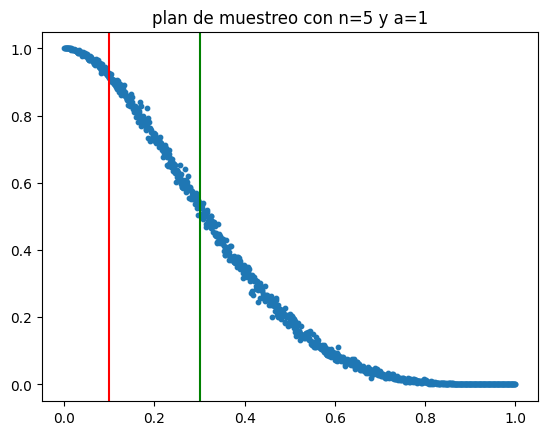

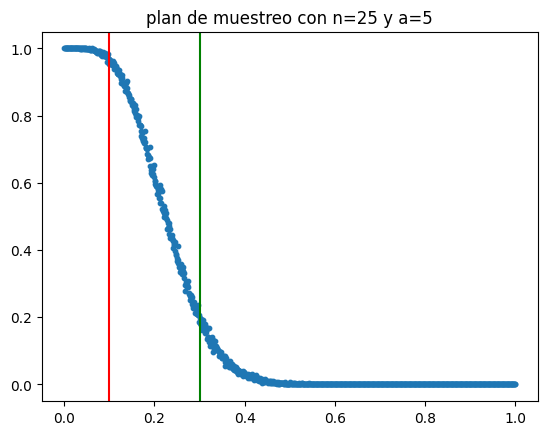

In [303]:
def piezasDefect(total,umb,N):
    x=np.linspace(0,1,N)
    probV=np.zeros(N)
    for i in range(x.shape[0]):
        arreglo=np.random.binomial(total,x[i],size=N)
        probV[i]=np.mean(arreglo <=umb)
    plt.scatter (x,probV, s=10)
    plt.title("plan de muestreo con n="+str(total)+" y a="+str(umb))
    plt.axvline(x=0.1, color='red')
    plt.axvline(x=0.3, color='green')
    plt.show()
    
    
piezasDefect(5,1,1000)
piezasDefect(25,5,1000)   
        

2. (a) segun las graficas, para una fraccion defectuosa de p=0.1, el mejor plan de muestreo es el de n=25 y a=5
   
   (b) por otro lado, para una fraccion defectuosa superiror a p=0.3, el mejor plan es el de n=5 y a=1

3. Distribuciones de probabilidad continuas

In [304]:
x = sp.symbols("x")
f = (x**2)/3
b = sp.integrate(f,(x,0,1))
c = sp.integrate(f,(x,1,2))

2.

In [305]:

media = 78
desv = 36
x = 72
desvest = np.sqrt(36)
z = (x-media)/desvest
P = 0.5 * (1 + sp.erf(z / sp.sqrt(2)))
result = P.evalf()
print(f"La probabilidad de la calificación sea mayor a 72 es: {result:.8f}")
x = sp.symbols("x")
p_a = 1-0.10
mini= sp.solve(sp.Eq(0.5 * (1 + sp.erf((x - media) / (desvest * sp.sqrt(2)))), p_a), x)
mini = mini[0].evalf()
print(f"La calificación mínima es: {mini:.2f}")
p_b = 1-0.281
mini= sp.solve(sp.Eq(0.5 * (1 + sp.erf((x - media) / (desvest * sp.sqrt(2)))), p_b), x)
mini = mini[0].evalf()
print(f"La calificación mínima es: {mini:.2f}")
p_25 = sp.solve(sp.Eq(0.5 * (1 + sp.erf((x - media) / (desvest * sp.sqrt(2)))), 0.25), x)[0]
p_25 = 0.5 * (1 + sp.erf((p_25 - media) / (desvest * sp.sqrt(2))))
sup = p_25 + 5
sup = 0.5 * (1 + sp.erf((sup - media) / (desvest * sp.sqrt(2))))
aprox = sup - p_25
aprox = aprox.evalf()
aprox

La probabilidad de la calificación sea mayor a 72 es: 0.15865525
La calificación mínima es: 85.69
La calificación mínima es: 81.48


-0.250000000000000

4. Cadenas de Markov

In [306]:
T=np.array([[0.4,0.25,0.3,0.1],
            [0.2,0.25,0.3,0.1],
            [0.2,0.25,0.1,0.1],
            [0.2,0.25,0.3,0.7]])

P1=0.25*T[2][3]*T[1][2]*T[3][1]*T[1][3]*T[0][1]*T[0][0]*T[0][0]
print("La probabilidad de la cadena [T, G, C, T, C, A, A, A] es =",P1)
E=np.array([[0.8,0,0,0.2],
            [0.05,0.9,0.1,0.1],
            [0.05,0.1,0.9,0],
            [0.1,0,0,0.7]])

P2=P1*E[3][3]*E[2][2]*E[1][1]*E[3][3]*E[1][1]*E[0][0]*E[0][0]*E[0][0]
print("La probabilidad de la cadena [A, C, G, A, G, U, U, U] es =",P2)

La probabilidad de la cadena [T, G, C, T, C, A, A, A] es = 7.500000000000001e-06
La probabilidad de la cadena [A, C, G, A, G, U, U, U] es = 1.3716864000000001e-06
